# 🚗 Car Price Prediction Using Machine Learning

## 🧾 Introduction

The aim of this project is to build a machine learning model that predicts the price of a car based on various features such as manufacturer, engine size, mileage, fuel type, and more. This involves a series of structured steps, from data understanding and cleaning to model training, evaluation, and interpretation.

### 🧠 Objectives

- Understand the dataset and clean any inconsistencies
- Perform exploratory data analysis (EDA) to understand data relationships
- Build and train a machine learning pipeline
- Evaluate the model using multiple performance metrics

## 🧪 Step 1: Load and Understand the Dataset

### 🔍 What to Do:
- Load the data
- Display the first few rows
- Check data types, null values, and unique va

In [234]:
import pandas as pd

df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [235]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

# 🧹 Step 2: Data Cleaning and Preprocessing

In [236]:
# Drop bad columns
import numpy as np
df= df.drop(columns=['ID','Doors'])

In [237]:
# Fix Levy
df['Levy'] = df['Levy'].replace('-', np.nan).astype(float)
df['Levy'] = df['Levy'].fillna(df['Levy'].median()).astype(int)

df['Price']=df['Price'].astype(int)

In [238]:

# Fix Mileage
# Remove 'km' or other units
df['Mileage'] = df['Mileage'].str.replace(' km', '', regex=False).str.strip()
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
print(df['Mileage'].head())

0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage, dtype: int64


In [239]:
# Fix Engine Volume
df['Engine volume'] = df['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)


In [240]:
print(df.dtypes)

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders           float64
Gear box type        object
Drive wheels         object
Wheel                object
Color                object
Airbags               int64
dtype: object


# 📊 Step 3: Exploratory Data Analysis (EDA)
🔍 What to Do:
Plot histograms, boxplots, scatterplots, and bar plots

Visualize relationships between features and price

In [241]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
df['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

In [244]:
df[df['Price'] < 1000].head()
df[df['Price'] > 1000000].head()


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
16983,26307500,781,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,Left wheel,Blue,0


In [245]:
df = df[(df['Price'] > 1000) & (df['Price'] < 200000)]



In [246]:
df=df[df['Price']>1000]
print(df.dtypes)

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders           float64
Gear box type        object
Drive wheels         object
Wheel                object
Color                object
Airbags               int64
dtype: object


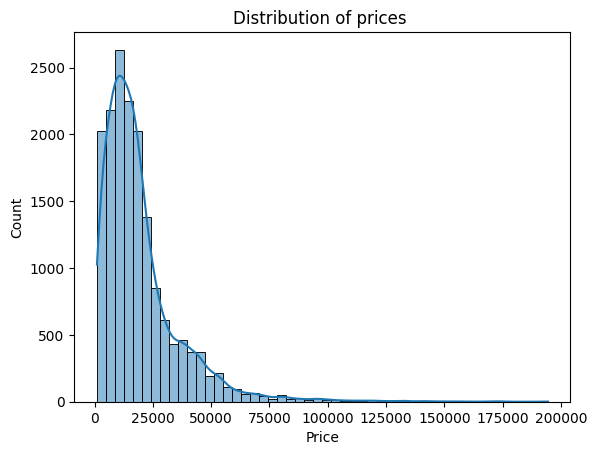

In [247]:
sns.histplot(df['Price'], bins=50,kde=True)
plt.title('Distribution of prices ')
plt.show()


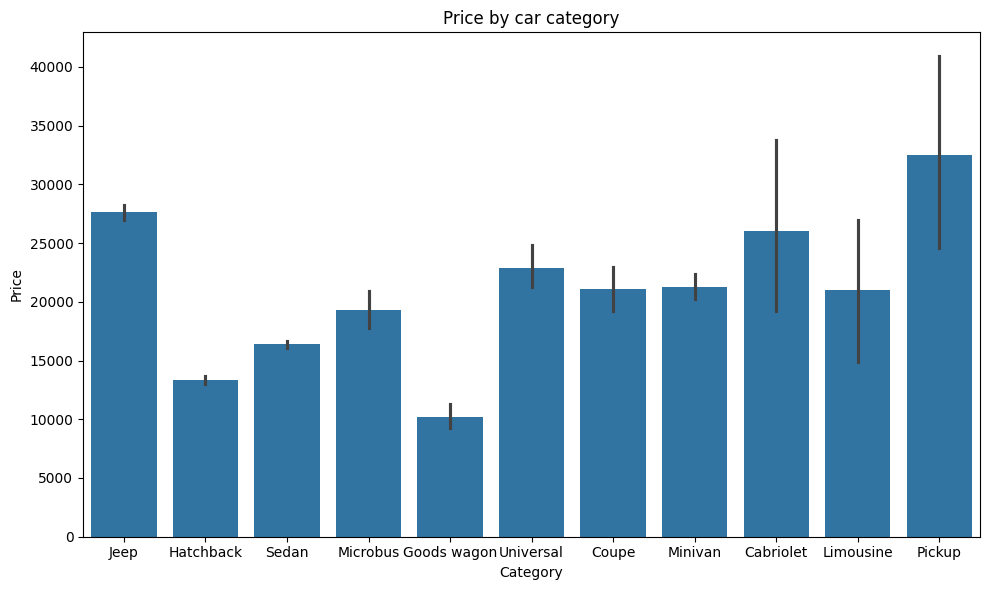

In [248]:
#Category vs price
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Category',y='Price')
plt.title('Price by car category')
plt.tight_layout()
plt.show()


# 🧠 Step 4: Feature Engineering 
🔍 What to Do:
-Convert  year to car age

-Encode categorical variables

-Create new features if needed

In [264]:

# Feature engineering function
def clean_and_engineer_features(df):
    df = df.copy()
    # Clean Mileage (remove units if present)
    if df['Mileage'].dtype == object:
        df['Mileage'] = df['Mileage'].str.replace(' km', '', regex=False).str.strip()
    df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
    
    # Calculate Age
    df['Age'] = 2025 - df['Prod. year']
    df['Age'] = df['Age'].clip(lower=0.1)  # Avoid zero/negative Age
    
    # Calculate Mileage_per_year
    df['Mileage_per_year'] = df['Mileage'] / df['Age']
    df['Mileage_per_year'] = df['Mileage_per_year'].replace([float('inf'), -float('inf')], 0)
    
    if df['Leather interior'].dtype == object:
        df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})
    df['Leather interior'] = df['Leather interior'].fillna(df['Leather interior'].mode()[0])
    if df['Levy'].dtype == object:
        df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
    df['Levy'] = df['Levy'].fillna(df['Levy'].mean())
    return df
   
df = clean_and_engineer_features(df)
print(df.head())

   Price  Levy Manufacturer    Model  Prod. year   Category  Leather interior  \
0  13328  1399        LEXUS   RX 450        2010       Jeep                 1   
1  16621  1018    CHEVROLET  Equinox        2011       Jeep                 0   
2   8467   781        HONDA      FIT        2006  Hatchback                 0   
3   3607   862         FORD   Escape        2011       Jeep                 1   
4  11726   446        HONDA      FIT        2014  Hatchback                 1   

  Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0    Hybrid            3.5   186005        6.0     Automatic          4x4   
1    Petrol            3.0   192000        6.0     Tiptronic          4x4   
2    Petrol            1.3   200000        4.0      Variator        Front   
3    Hybrid            2.5   168966        4.0     Automatic          4x4   
4    Petrol            1.3    91901        4.0     Automatic        Front   

              Wheel   Color  Airbags  Age  Mileage

# 🧪 Step 5: Split Data and Prepare for Modeling
🔍 What to Do:
Define features (X) and target (y)

Distinguish numerical and categorical columns

Train-test split

Build preprocessing pipeline

In [265]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer

In [266]:

X = df.drop(columns=['Price'])
y = df['Price']
print(df.dtypes)                

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior      int64
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders           float64
Gear box type        object
Drive wheels         object
Wheel                object
Color                object
Airbags               int64
Age                   int64
Mileage_per_year    float64
dtype: object


In [267]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
categorical = X_train.select_dtypes(include='object').columns.tolist()
numerical = X_train.select_dtypes(exclude='object').columns.tolist()
print("Categorical:", categorical)
print("Numerical:", numerical)


Categorical: ['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
Numerical: ['Levy', 'Prod. year', 'Leather interior', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age', 'Mileage_per_year']


# 🤖 Step 6: Model Training
🔍 What to Do:
Choose models 

Train using pipeline

1. Define function to:
Train a model

Predict

Evaluate using metrics like MAE, MSE, RMSE, and R²

2. Create a list/dictionary of models to test
3. Loop through models and collect their evaluation results

In [268]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [269]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


In [270]:
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer()),('scaler',StandardScaler())])
categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder(handle_unknown='ignore'))])
preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer,numerical),('cat',categorical_transformer,categorical)])

In [271]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

}

In [272]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # build fresh pipeline for this model
    pipeline = Pipeline(steps=[
        ('feature_engineering', FunctionTransformer(clean_and_engineer_features)),
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f"📊 {name}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 30)

In [273]:
print(y.dtype) # should be int or float
print(y.head())  # should show price numbers like 12000, 34500, etc.


int64
0    13328
1    16621
2     8467
3     3607
4    11726
Name: Price, dtype: int64


In [274]:
# 1. Target should be numeric
print("y_train dtype:", y_train.dtype)
print("y_train sample:", y_train.head())

# 2. No string sneaking into y by mistake
print("Unique sample of y_train (first 20):", pd.Series(y_train).unique()[:20])

# 3. Features: which are categorical vs numeric
print("Categorical cols:", [c for c in X_train.columns if X_train[c].dtype == 'object'])
print("Numerical cols:", [c for c in X_train.columns if X_train[c].dtype in ['int64', 'float64']])

# 4. Show a few rows to see raw values
print(X_train.iloc[:3].to_dict(orient='records'))


y_train dtype: int64
y_train sample: 17249     8075
10770     9722
8648      8467
17167    61154
16778    38217
Name: Price, dtype: int64
Unique sample of y_train (first 20): [ 8075  9722  8467 61154 38217 13799 17249 36065 25402 31361  5645 12231
 16091 23521 66482  7000  3136 28852 24709 10036]
Categorical cols: ['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
Numerical cols: ['Levy', 'Prod. year', 'Leather interior', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age', 'Mileage_per_year']
[{'Levy': 781, 'Manufacturer': 'VOLKSWAGEN', 'Model': 'Jetta', 'Prod. year': 2012, 'Category': 'Sedan', 'Leather interior': 1, 'Fuel type': 'Petrol', 'Engine volume': 2.5, 'Mileage': 164800, 'Cylinders': 4.0, 'Gear box type': 'Tiptronic', 'Drive wheels': 'Front', 'Wheel': 'Left wheel', 'Color': 'Grey', 'Airbags': 12, 'Age': 13, 'Mileage_per_year': 12676.923076923076}, {'Levy': 765, 'Manufacturer': 'HYUNDAI', 'Model': 'Sonata', 'Prod. year':

In [275]:
print(df[['Mileage', 'Mileage_per_year']].isna().sum())

Mileage             0
Mileage_per_year    0
dtype: int64


In [276]:
# Show what y_train is
print(type(y_train))
print(y_train.head())


<class 'pandas.core.series.Series'>
17249     8075
10770     9722
8648      8467
17167    61154
16778    38217
Name: Price, dtype: int64


In [277]:
for name, model in models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

📊 Linear Regression
MAE: 8184.50
MSE: 170428877.24
RMSE: 13054.84
R² Score: 0.43
------------------------------
📊 Ridge Regression
MAE: 7988.92
MSE: 158195990.78
RMSE: 12577.60
R² Score: 0.47
------------------------------
📊 Decision Tree
MAE: 4975.87
MSE: 104107651.43
RMSE: 10203.32
R² Score: 0.65
------------------------------
📊 Random Forest
MAE: 4045.65
MSE: 66403975.17
RMSE: 8148.86
R² Score: 0.78
------------------------------
📊 XGBoost
MAE: 5307.96
MSE: 80049570.20
RMSE: 8947.04
R² Score: 0.73
------------------------------


In [228]:
best_model= models['XGBoost']
final_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',best_model)
])
final_pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Levy', 'Prod. year',
                                                   'Leather interior',
                                                   'Engine volume', 'Mileage',
                                                   'Cylinders', 'Airbags',
                                                   'Age', 'Mileage_per_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotE...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [229]:
import joblib

In [230]:
joblib.dump(final_pipeline,'xgb_car_price_pipeline.pkl')
print('pipeline saved sucessfully')

pipeline saved sucessfully


In [231]:
loaded_pipeline=joblib.load('xgb_car_price_pipeline.pkl')
print(loaded_pipeline.named_steps)

{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Levy', 'Prod. year', 'Leather interior',
                                  'Engine volume', 'Mileage', 'Cylinders',
                                  'Airbags', 'Age', 'Mileage_per_year']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Manufacturer', 'Model', 'Category',
                                  'Fuel type', 'Gear box type', 'Drive wheels',
                                  'Wheel', 'Color'])]), 'mod

In [232]:
!where python

C:\Users\Ibrah\anaconda3\python.exe
C:\Python312\python.exe
C:\Users\Ibrah\AppData\Local\Microsoft\WindowsApps\python.exe
